In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from sklearn import tree
from tensorflow.keras import models, layers
import warnings

from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import precision_recall_curve,precision_recall_fscore_support
import seaborn as sns
import pickle

warnings.filterwarnings('ignore')

path = "./drive/MyDrive/Colab Notebooks/ADT_Project/"

# Load and process the data


*   Load the data
*   Vectorize and store the vector file
*   Create train and test datasets and save the files





In [3]:
df = pd.read_csv(path+"processed_data.csv")
print("Data Shape:", df.shape)
df.head(10)

Data Shape: (1004, 2)


,Sentence,Label
0,"db.mycol.find({$and:[{""by"":""tutorials point""},...",0
1,"db.collection('users').findOne({""""username"""": ...",1
2,"db.Document.find({ ""type"": { ""$gte"": """" } })",1
3,"db.Document.find({ ""type"": { ""$ne: 0 """" } })",1
4,"db.books.insert({ title: 'The Hobbit', author:...",0
5,db.books.find({ title: 'The Hobbit' }),0
6,"db.logins.find({ username: 'tolkien', password...",0
7,"db.logins.find({ username: { $ne: 1 }, passwor...",1
8,"db.doc.find({ username: 'tolkien', $or: [ {}, ...",1
9,"db.user.save({""_id"" : 1234, ""name"" : {""first"":...",0


In [4]:
X = df['Sentence']
y = df['Label']
print(X.shape, y.shape)
print("Dataset Input:", "\n", X.head(5))
print("Dataset Label:", "\n", y.head(5))

(1004,) (1004,)
Dataset Input: 
 0    db.mycol.find({$and:[{"by":"tutorials point"},...
1    db.collection('users').findOne({""username"": ...
2         db.Document.find({ "type": { "$gte": "" } })
3         db.Document.find({ "type": { "$ne: 0 "" } })
4    db.books.insert({ title: 'The Hobbit', author:...
Name: Sentence, dtype: object
Dataset Label: 
 0    0
1    1
2    1
3    1
4    0
Name: Label, dtype: int64


In [5]:
import nltk
nltk.download('stopwords')
# vectorizer = CountVectorizer(min_df = 2, max_df = 0.7, stop_words = stopwords.words('english'))
vectorizer = pickle.load(open(path + "vectorizer", 'rb'))
X = vectorizer.fit_transform(X.values.astype('U')).toarray()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
# Save the Vectorizer
with open(path + 'vectorizer', 'wb') as fin:
    pickle.dump(vectorizer, fin)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(803, 685)
(803,)
(201, 685)
(201,)


In [8]:
# Save the processed data

pd.DataFrame(X_train).to_csv(path + 'training_and_testing_data/X_train.csv', index=False)
pd.DataFrame(X_test).to_csv(path + 'training_and_testing_data/X_test.csv', index=False)
pd.DataFrame(y_train).to_csv(path + 'training_and_testing_data/y_train.csv', index=False)
pd.DataFrame(y_test).to_csv(path + 'training_and_testing_data/y_test.csv', index=False)

# Train the Models


*   Train models using differnt Algorithms
*   Store the models as files using pickle



In [9]:
# Load the train and test data from files

X_train = pd.read_csv(path+"training_and_testing_data/X_train.csv", encoding='utf-8')
X_test = pd.read_csv(path+"training_and_testing_data/X_test.csv", encoding='utf-8')
y_train = pd.read_csv(path+"training_and_testing_data/y_train.csv", encoding='utf-8')
y_test = pd.read_csv(path+"training_and_testing_data/y_test.csv", encoding='utf-8')

In [10]:
f1_dict = {}
precision_dict = {}
recall_dict = {}
accuracy_dict = {}
train_accuracy = {}
validation_accuracy = {}
test_accuracy = {}

## LOGISTIC REGRESSION

In [11]:
lr_clf = LogisticRegression(solver='lbfgs')
y_pred_lr = lr_clf.fit(X_train, y_train)
y_pred = y_pred_lr.predict(X_test)
print(f"Accuracy of Logistic Regression on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Logistic Regression on test set : {f1_score(y_pred, y_test)}")

# Updates model score to f1_dict
f1_dict["LogisticRegression"] = f1_score(y_pred, y_test)
precision_dict["LogisticRegression"] = precision_score(y_pred, y_test)
recall_dict["LogisticRegression"] = recall_score(y_pred, y_test)
accuracy_dict['LogisticRegression'] = accuracy_score(y_pred, y_test)

Accuracy of Logistic Regression on test set : 0.9701492537313433
F1 Score of Logistic Regression on test set : 0.9090909090909091


In [12]:
# Save the model

filename = path + "models/lr_model.sav"
pickle.dump(lr_clf, open(filename, 'wb'))

## RANDOM FOREST

In [13]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print(f"Accuracy of Random Forest on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Random Forest on test set : {f1_score(y_pred, y_test)}")

# Updates model score to f1_dict
f1_dict["RandomForest"] = f1_score(y_pred, y_test)
precision_dict["RandomForest"] = precision_score(y_pred, y_test)
recall_dict["RandomForest"] = recall_score(y_pred, y_test)
accuracy_dict['RandomForest'] = accuracy_score(y_pred, y_test)

Accuracy of Random Forest on test set : 0.9651741293532339
F1 Score of Random Forest on test set : 0.8955223880597014


In [14]:
# Save the model

filename = path + "models/rf_model.sav"
pickle.dump(rf_clf, open(filename, 'wb'))

## SUPPORT VECTOR MACHINES

In [15]:
svm_clf = SVC(gamma = 'scale')
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
print(f"Accuracy of SVM on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of SVM on test set : {f1_score(y_pred, y_test)}")

# Updates model score to f1_dict
f1_dict["SVM"] = f1_score(y_pred, y_test)
precision_dict["SVM"] = precision_score(y_pred, y_test)
recall_dict["SVM"] = recall_score(y_pred, y_test)
accuracy_dict['SVM'] = accuracy_score(y_pred, y_test)

Accuracy of SVM on test set : 0.9701492537313433
F1 Score of SVM on test set : 0.90625


In [16]:
# Save the model

filename = path + "models/svm_model.sav"
pickle.dump(svm_clf, open(filename, 'wb'))

## NAIVE BAYES

In [17]:
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_pred = nb_clf.predict(X_test)
print(f"Accuracy of Naive Bayes on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Naive Bayes on test set : {f1_score(y_pred, y_test)}")

# Updates model score to f1_dict
f1_dict["NaiveBayes"] = f1_score(y_pred, y_test)
precision_dict["NaiveBayes"] = precision_score(y_pred, y_test)
recall_dict["NaiveBayes"] = recall_score(y_pred, y_test)
accuracy_dict['NaiveBayes'] = accuracy_score(y_pred, y_test)

Accuracy of Naive Bayes on test set : 0.9203980099502488
F1 Score of Naive Bayes on test set : 0.8048780487804877


In [18]:
# Save the model

filename = path + "models/nb_model.sav"
pickle.dump(nb_clf, open(filename, 'wb'))

## DECISION TREES


In [19]:
DT = tree.DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
print(f"Accuracy of Naive Bayes on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Naive Bayes on test set : {f1_score(y_pred, y_test)}")

# Updates model score to f1_dict
f1_dict["DecisionTree"] = f1_score(y_pred, y_test)
precision_dict["DecisionTree"] = precision_score(y_pred, y_test)
recall_dict["DecisionTree"] = recall_score(y_pred, y_test)
accuracy_dict['DecisionTree'] = accuracy_score(y_pred, y_test)

Accuracy of Naive Bayes on test set : 0.945273631840796
F1 Score of Naive Bayes on test set : 0.8450704225352113


In [20]:
# Save the model

filename = path + "models/dt_model.sav"
pickle.dump(DT, open(filename, 'wb'))

## Gradient Boosting

In [23]:

# lr_list = [0.5, 0.8, 1, 1.5, 2] # Checkign which is the best learning rate
lr_list = [1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  1
Accuracy score (training): 0.961
Accuracy score (validation): 0.960


In [27]:
# Updates model score to f1_dict
f1_dict["Gradient Boosting"] = f1_score(y_pred, y_test)
precision_dict["Gradient Boosting"] = precision_score(y_pred, y_test)
recall_dict["Gradient Boosting"] = recall_score(y_pred, y_test)
accuracy_dict["Gradient Boosting"] = accuracy_score(y_pred, y_test)

In [24]:
# Save the model

filename = path + "models/gd_model.sav"
pickle.dump(gb_clf, open(filename, 'wb'))

# Plot for Models Performances

In [28]:
keys2 = f1_dict, precision_dict, recall_dict, accuracy_dict
metrics = ['F1_Score', 'Precision', 'Recall', 'Accuracy']
data = pd.DataFrame(keys2)
data.index = metrics
data

,LogisticRegression,RandomForest,SVM,NaiveBayes,DecisionTree,Gradient Boosting
F1_Score,0.909091,0.895522,0.906250,0.804878,0.845070,0.845070
Precision,0.909091,0.909091,0.878788,1.000000,0.909091,0.909091
Recall,0.909091,0.882353,0.935484,0.673469,0.789474,0.789474
Accuracy,0.970149,0.965174,0.970149,0.920398,0.945274,0.945274


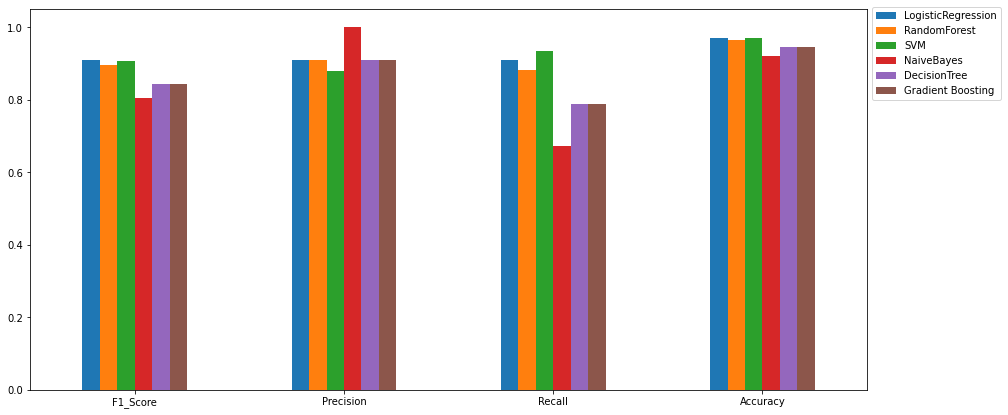

In [29]:
result = data.plot(kind='bar', rot=0, figsize=(15, 7));
result.legend(bbox_to_anchor=(1, 1.02), loc='upper left');

# Manual Testing

In [ ]:
# Execute these to load the requirements
# import numpy as np
# import pandas as pd
# from sklearn.feature_extraction.text import CountVectorizer
# from nltk.corpus import stopwords
# from sklearn.metrics import accuracy_score, f1_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# import tensorflow as tf
# import seaborn as sns
import pickle

myvectorizer = pickle.load(open(path + "vectorizer", 'rb'))

In [ ]:
input_val="1, ( select  ( case when  ( 1609 = 1609 )  then waitfor delay '0:0:5' else 1609* ( select 1609 from master..sysdatabases )  end  )  )  "
input_val=[input_val]
input_val=myvectorizer.transform(input_val).toarray()

mymodel = pickle.load(open(path + "models/lr_model.sav", 'rb'))
result=mymodel.predict(input_val)

print(result)


[1]
